In [1]:
import pandas as pd
from string import punctuation
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
%matplotlib inline

In [2]:
file = 'http://bit.ly/aqmd-violations-final'
titlev = 'http://bit.ly/aqmd-titlev'
reclaim = 'http://bit.ly/aqmd-reclaim'

In [3]:
df_all = pd.read_csv(file)
df_titleV = pd.read_csv(titlev)
df_reclaim = pd.read_csv(reclaim)

In [4]:
df_all.head()

,facility id,notification,Attorney,Total,url,violation_data,equipment
0,3704,P56324,KCM,7200.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Failed to reconcile quarterly NOx emissions in...,NOX RECLAIM facility
1,3704,P56323,KCM,7200.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Inaccurate QCERs. Inaccurate APEP.,NOx RECLAIM facility
2,2526,P37231,BTG,3500.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,FAILURE TO KEEP THE ROOF OF INTERNAL FLOATING ...,NaN
3,2526,P37230,BTG,3500.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,FAILURE TO OPERATE AND MAINTAIN A CONTINUOUS M...,NaN
4,158141,P60306,WBW,9438.66,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Selling architectural coatings within the SCAQ...,NaN


In [5]:
df_all['type'] = ''

In [6]:
df_all.head()

,facility id,notification,Attorney,Total,url,violation_data,equipment,type
0,3704,P56324,KCM,7200.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Failed to reconcile quarterly NOx emissions in...,NOX RECLAIM facility,
1,3704,P56323,KCM,7200.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Inaccurate QCERs. Inaccurate APEP.,NOx RECLAIM facility,
2,2526,P37231,BTG,3500.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,FAILURE TO KEEP THE ROOF OF INTERNAL FLOATING ...,NaN,
3,2526,P37230,BTG,3500.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,FAILURE TO OPERATE AND MAINTAIN A CONTINUOUS M...,NaN,
4,158141,P60306,WBW,9438.66,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Selling architectural coatings within the SCAQ...,NaN,


In [7]:
df_titleV.head()

,Facility ID,Facility Name,City,County,Initial Issue Date,Renewal Date
0,35188,3M COMPANY,MONROVIA,LA,6/17/13,NaN
1,800088,3M COMPANY,CORONA,RV,5/9/00,5/4/12
2,45489,"ABBOTT CARDIOVASCULAR SYSTEMS, INC.",TEMECULA,RV,10/26/01,1/11/12
3,47084,ADVANCE PAPER BOX CO,LOS ANGELES,LA,8/13/01,9/16/11
4,57390,ADVANCE TRUCK PAINTING INC,PICO RIVERA,LA,4/16/01,6/7/11


In [8]:
df_reclaim.head()

,Fac_id
0,136
1,346
2,550
3,1073
4,1744


In [9]:
reclaim_list = df_reclaim['Fac_id'].tolist()

In [10]:
titlev_list = df_titleV['Facility ID'].tolist()

In [11]:
reclaim_titlev_list = [facility for facility in titlev_list if facility in reclaim_list]

In [12]:
list_error = []
for index, row in df_all.iterrows():
    try:
        pd.to_numeric(row['facility id'])
    except:
        list_error.append(row)
list_error

[facility id                                                  16, 20
 notification                                                 P57290
 Attorney                                                        WBW
 Total                                                         40000
 url               http://www3.aqmd.gov/webappl/fim/prog/novdetai...
 violation_data    failure to conduct NOx emissions checks monthl...
 equipment                                                       NaN
 type                                                               
 Name: 475, dtype: object,
 facility id                                                  16, 20
 notification                                                 P57290
 Attorney                                                        FAC
 Total                                                         40000
 url               http://www3.aqmd.gov/webappl/fim/prog/novdetai...
 violation_data    failure to conduct NOx emissions checks monthl...
 equipm

In [13]:
for each in list_error:
    print(each['facility id'])

16, 20
16, 20
16, 20
2344 2
202, 2
31, 20
31, 20
10/1
10/1
10/1


In [14]:
for each in list_error:
    print(each['notification'])

P57290
P57290
P57290
P63673
HRB2169
SRV97
SRV97
HRB2187
HRB2191
HRB2191


In [15]:
df_all.iloc[475]['facility id']
df_all.set_value(475, 'facility id', '50134')

,facility id,notification,Attorney,Total,url,violation_data,equipment,type
0,3704,P56324,KCM,7200.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Failed to reconcile quarterly NOx emissions in...,NOX RECLAIM facility,
1,3704,P56323,KCM,7200.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Inaccurate QCERs. Inaccurate APEP.,NOx RECLAIM facility,
2,2526,P37231,BTG,3500.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,FAILURE TO KEEP THE ROOF OF INTERNAL FLOATING ...,NaN,
3,2526,P37230,BTG,3500.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,FAILURE TO OPERATE AND MAINTAIN A CONTINUOUS M...,NaN,
4,158141,P60306,WBW,9438.66,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Selling architectural coatings within the SCAQ...,NaN,
5,115862,P59039,NSF,1000.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,FAILURE TO CONDUCT REVERIFICATION TEST 6 MONTH...,NaN,
6,115862,P61478,NSF,1000.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Failure to post permit on site. Failure to pro...,to repair/replace vapor recovery components wi...,
7,115862,P61475,NSF,1000.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Operating a gasoline dispensing facility contr...,NaN,
8,800057,P52622,BTG,3000.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,"TWO VAPOR RECOVERY HOSES LEAKING ABOVE 3,000 P...",NaN,
9,84456,P61702,NSF,2500.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Operating an AJAX boiler rated at 4.25 million...,AJAX boiler rated at 4.25 million btu/hr,


In [16]:
df_all.iloc[476]
df_all.set_value(476, 'facility id', '50134')

,facility id,notification,Attorney,Total,url,violation_data,equipment,type
0,3704,P56324,KCM,7200.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Failed to reconcile quarterly NOx emissions in...,NOX RECLAIM facility,
1,3704,P56323,KCM,7200.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Inaccurate QCERs. Inaccurate APEP.,NOx RECLAIM facility,
2,2526,P37231,BTG,3500.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,FAILURE TO KEEP THE ROOF OF INTERNAL FLOATING ...,NaN,
3,2526,P37230,BTG,3500.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,FAILURE TO OPERATE AND MAINTAIN A CONTINUOUS M...,NaN,
4,158141,P60306,WBW,9438.66,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Selling architectural coatings within the SCAQ...,NaN,
5,115862,P59039,NSF,1000.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,FAILURE TO CONDUCT REVERIFICATION TEST 6 MONTH...,NaN,
6,115862,P61478,NSF,1000.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Failure to post permit on site. Failure to pro...,to repair/replace vapor recovery components wi...,
7,115862,P61475,NSF,1000.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Operating a gasoline dispensing facility contr...,NaN,
8,800057,P52622,BTG,3000.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,"TWO VAPOR RECOVERY HOSES LEAKING ABOVE 3,000 P...",NaN,
9,84456,P61702,NSF,2500.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Operating an AJAX boiler rated at 4.25 million...,AJAX boiler rated at 4.25 million btu/hr,


In [17]:
df_all.iloc[477]
df_all.set_value(477, 'facility id', '50134')

,facility id,notification,Attorney,Total,url,violation_data,equipment,type
0,3704,P56324,KCM,7200.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Failed to reconcile quarterly NOx emissions in...,NOX RECLAIM facility,
1,3704,P56323,KCM,7200.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Inaccurate QCERs. Inaccurate APEP.,NOx RECLAIM facility,
2,2526,P37231,BTG,3500.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,FAILURE TO KEEP THE ROOF OF INTERNAL FLOATING ...,NaN,
3,2526,P37230,BTG,3500.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,FAILURE TO OPERATE AND MAINTAIN A CONTINUOUS M...,NaN,
4,158141,P60306,WBW,9438.66,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Selling architectural coatings within the SCAQ...,NaN,
5,115862,P59039,NSF,1000.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,FAILURE TO CONDUCT REVERIFICATION TEST 6 MONTH...,NaN,
6,115862,P61478,NSF,1000.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Failure to post permit on site. Failure to pro...,to repair/replace vapor recovery components wi...,
7,115862,P61475,NSF,1000.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Operating a gasoline dispensing facility contr...,NaN,
8,800057,P52622,BTG,3000.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,"TWO VAPOR RECOVERY HOSES LEAKING ABOVE 3,000 P...",NaN,
9,84456,P61702,NSF,2500.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Operating an AJAX boiler rated at 4.25 million...,AJAX boiler rated at 4.25 million btu/hr,


In [18]:
df_all.iloc[1284]
df_all.set_value(1284, 'facility id', '2344')

,facility id,notification,Attorney,Total,url,violation_data,equipment,type
0,3704,P56324,KCM,7200.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Failed to reconcile quarterly NOx emissions in...,NOX RECLAIM facility,
1,3704,P56323,KCM,7200.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Inaccurate QCERs. Inaccurate APEP.,NOx RECLAIM facility,
2,2526,P37231,BTG,3500.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,FAILURE TO KEEP THE ROOF OF INTERNAL FLOATING ...,NaN,
3,2526,P37230,BTG,3500.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,FAILURE TO OPERATE AND MAINTAIN A CONTINUOUS M...,NaN,
4,158141,P60306,WBW,9438.66,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Selling architectural coatings within the SCAQ...,NaN,
5,115862,P59039,NSF,1000.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,FAILURE TO CONDUCT REVERIFICATION TEST 6 MONTH...,NaN,
6,115862,P61478,NSF,1000.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Failure to post permit on site. Failure to pro...,to repair/replace vapor recovery components wi...,
7,115862,P61475,NSF,1000.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Operating a gasoline dispensing facility contr...,NaN,
8,800057,P52622,BTG,3000.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,"TWO VAPOR RECOVERY HOSES LEAKING ABOVE 3,000 P...",NaN,
9,84456,P61702,NSF,2500.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Operating an AJAX boiler rated at 4.25 million...,AJAX boiler rated at 4.25 million btu/hr,


In [19]:
list_error = []
for index, row in df_all.iterrows():
    try:
        pd.to_numeric(row['facility id'])
    except:
        list_error.append(row)
list_error

[facility id                                                  202, 2
 notification                                                HRB2169
 Attorney                                                        INT
 Total                                                          1000
 url               http://www3.aqmd.gov/webappl/fim/prog/novdetai...
 violation_data                                                  NaN
 equipment                                                       NaN
 type                                                               
 Name: 1695, dtype: object,
 facility id                                                  31, 20
 notification                                                  SRV97
 Attorney                                                        WBW
 Total                                                        213376
 url               http://www3.aqmd.gov/webappl/fim/prog/novdetai...
 violation_data                                                  NaN
 equip

In [20]:
for each in list_error:
    print(each['facility id'])

202, 2
31, 20
31, 20
10/1
10/1
10/1


In [21]:
for each in list_error:
    print(each['notification'])

HRB2169
SRV97
SRV97
HRB2187
HRB2191
HRB2191


In [22]:
df_all.drop(df_all.index[1695])

,facility id,notification,Attorney,Total,url,violation_data,equipment,type
0,3704,P56324,KCM,7200.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Failed to reconcile quarterly NOx emissions in...,NOX RECLAIM facility,
1,3704,P56323,KCM,7200.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Inaccurate QCERs. Inaccurate APEP.,NOx RECLAIM facility,
2,2526,P37231,BTG,3500.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,FAILURE TO KEEP THE ROOF OF INTERNAL FLOATING ...,NaN,
3,2526,P37230,BTG,3500.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,FAILURE TO OPERATE AND MAINTAIN A CONTINUOUS M...,NaN,
4,158141,P60306,WBW,9438.66,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Selling architectural coatings within the SCAQ...,NaN,
5,115862,P59039,NSF,1000.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,FAILURE TO CONDUCT REVERIFICATION TEST 6 MONTH...,NaN,
6,115862,P61478,NSF,1000.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Failure to post permit on site. Failure to pro...,to repair/replace vapor recovery components wi...,
7,115862,P61475,NSF,1000.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Operating a gasoline dispensing facility contr...,NaN,
8,800057,P52622,BTG,3000.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,"TWO VAPOR RECOVERY HOSES LEAKING ABOVE 3,000 P...",NaN,
9,84456,P61702,NSF,2500.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Operating an AJAX boiler rated at 4.25 million...,AJAX boiler rated at 4.25 million btu/hr,


In [23]:
list_error = []
for index, row in df_all.iterrows():
    try:
        pd.to_numeric(row['facility id'])
    except:
        list_error.append(row)
        print(index)

1695
2066
2067
3138
3140
3141


In [24]:
df_all = df_all.drop(df_all.index[[1695,
2066,
2067,
3138,
3140,
3141]])

In [25]:
list_error = []
for index, row in df_all.iterrows():
    try:
        pd.to_numeric(row['facility id'])
    except:
        list_error.append(row)
        print(index)

In [26]:
df_all.head()

,facility id,notification,Attorney,Total,url,violation_data,equipment,type
0,3704,P56324,KCM,7200.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Failed to reconcile quarterly NOx emissions in...,NOX RECLAIM facility,
1,3704,P56323,KCM,7200.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Inaccurate QCERs. Inaccurate APEP.,NOx RECLAIM facility,
2,2526,P37231,BTG,3500.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,FAILURE TO KEEP THE ROOF OF INTERNAL FLOATING ...,NaN,
3,2526,P37230,BTG,3500.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,FAILURE TO OPERATE AND MAINTAIN A CONTINUOUS M...,NaN,
4,158141,P60306,WBW,9438.66,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Selling architectural coatings within the SCAQ...,NaN,


In [27]:
index_row = []
for index, row in df_all.iterrows():
    try:
        if float(row['facility id']) in titlev_list:
            df_all.set_value(index, 'type', 't')
        elif float(row['facility id']) in reclaim_list:
            df_all.set_value(index, 'type', 'r')
        else:
            df_all.set_value(index, 'type', 'n')
    except:
        index_row.append(row)

In [28]:
index_row = []
for index, row in df_all.iterrows():
    try:
        if float(row['facility id']) in reclaim_titlev_list:
            df_all.set_value(index, 'type', 'rt')
    except:
        index_row.append(row)
index_row

[]

In [29]:
df_all.head(50)

,facility id,notification,Attorney,Total,url,violation_data,equipment,type
0,3704,P56324,KCM,7200.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Failed to reconcile quarterly NOx emissions in...,NOX RECLAIM facility,rt
1,3704,P56323,KCM,7200.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Inaccurate QCERs. Inaccurate APEP.,NOx RECLAIM facility,rt
2,2526,P37231,BTG,3500.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,FAILURE TO KEEP THE ROOF OF INTERNAL FLOATING ...,NaN,t
3,2526,P37230,BTG,3500.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,FAILURE TO OPERATE AND MAINTAIN A CONTINUOUS M...,NaN,t
4,158141,P60306,WBW,9438.66,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Selling architectural coatings within the SCAQ...,NaN,n
5,115862,P59039,NSF,1000.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,FAILURE TO CONDUCT REVERIFICATION TEST 6 MONTH...,NaN,n
6,115862,P61478,NSF,1000.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Failure to post permit on site. Failure to pro...,to repair/replace vapor recovery components wi...,n
7,115862,P61475,NSF,1000.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Operating a gasoline dispensing facility contr...,NaN,n
8,800057,P52622,BTG,3000.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,"TWO VAPOR RECOVERY HOSES LEAKING ABOVE 3,000 P...",NaN,t
9,84456,P61702,NSF,2500.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Operating an AJAX boiler rated at 4.25 million...,AJAX boiler rated at 4.25 million btu/hr,n


In [30]:
df_all.shape

(3682, 8)

In [31]:
df_rt = df_all[(df_all['type'] == 'rt')]
df_rt

,facility id,notification,Attorney,Total,url,violation_data,equipment,type
0,3704,P56324,KCM,7200.0,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Failed to reconcile quarterly NOx emissions in...,NOX RECLAIM facility,rt
1,3704,P56323,KCM,7200.0,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Inaccurate QCERs. Inaccurate APEP.,NOx RECLAIM facility,rt
19,11034,P55543,TRB,1000.0,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,The electronic report of daily mass emissions ...,NaN,rt
20,800026,SRV105,KCM,71200.0,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,NaN,NaN,rt
69,800408,P59376,TRB,1000.0,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Operating Device #C160 contrary to permit cond...,NaN,rt
125,12155,P60840,MJR,500.0,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,OPERATING A GASOLINE DISPENSING FACILITY CONTR...,IT SHOULD BE LOCKED IN THE OPEN POSITION.,rt
165,800089,HRB2320,TRB,830000.0,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,NaN,NaN,rt
166,800089,HRB2320,INT,830000.0,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,NaN,NaN,rt
190,25638,P37235,MJR,500.0,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,EXCEEDANCE OF 6.0 PPMV CO EMISSION LIMIT ON MA...,NaN,rt
191,25638,P55672,MJR,500.0,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,1) INACCURATE QCER DURING 2013 YEAR CYCLE 2; 2...,NaN,rt


In [32]:
df_attorney = df_all[['type', 'Attorney']].groupby(['type', 'Attorney'])['Attorney'].count().unstack()
df_attorney.columns.tolist()

['AJO',
 'BBB',
 'BKT',
 'BST',
 'BTG',
 'FAC',
 'INT',
 'JMP',
 'KCM',
 'KRW',
 'LBN',
 'MJR',
 'NAS',
 'NOV',
 'NSF',
 'Nbr',
 'PH3',
 'RFL',
 'RRF',
 'SMP',
 'TCF',
 'TRB',
 'VKT',
 'WBW']

In [33]:
df_attorney

Attorney,AJO,BBB,BKT,BST,BTG,FAC,INT,JMP,KCM,KRW,...,NSF,Nbr,PH3,RFL,RRF,SMP,TCF,TRB,VKT,WBW
type,,,,,,,,,,,,,,,,,,,,,
n,NaN,4.0,2.0,7.0,56.0,103.0,1102.0,37.0,216.0,7.0,...,244.0,51.0,66.0,4.0,27.0,1.0,26.0,133.0,43.0,111.0
r,NaN,1.0,NaN,NaN,11.0,5.0,14.0,18.0,16.0,NaN,...,28.0,NaN,NaN,1.0,5.0,NaN,NaN,23.0,6.0,6.0
rt,2.0,1.0,NaN,1.0,12.0,8.0,31.0,16.0,33.0,8.0,...,73.0,2.0,NaN,NaN,4.0,NaN,1.0,64.0,1.0,7.0
t,2.0,NaN,NaN,4.0,10.0,7.0,40.0,10.0,62.0,3.0,...,20.0,3.0,1.0,NaN,16.0,1.0,1.0,45.0,4.0,6.0


In [34]:
df_facility_average = df_all.groupby(['type'], as_index=False).mean()
df_facility_average

,type,Total
0,n,11762.097454
1,r,38479.358108
2,rt,523801.033898
3,t,446882.295084


In [35]:
from string import punctuation

In [36]:
punctuation_symbols = []
for each in list(punctuation):
    punctuation_symbols.append((each))

In [37]:
set(df_all['type'].tolist())

{'n', 'r', 'rt', 't'}

In [38]:
len(df_all['type'].tolist())

3682

In [39]:
df_all = df_all.dropna(subset=['violation_data'])
df_all.shape

(3336, 8)

In [40]:
def remove_puncuation(d):
    for each in punctuation_symbols:
        d = d.replace(each, '')
    return d

In [41]:
def remove_digits(x):
    x = ''.join([i for i in x if not i.isdigit()])
    return x

In [42]:
df_all['violation_data'] = df_all.violation_data.apply(remove_digits)
df_all['violation_data'] = df_all.violation_data.apply(remove_puncuation)
df_all['violation_data'] = df_all['violation_data'].str.lower()

In [43]:
df_all.head()

,facility id,notification,Attorney,Total,url,violation_data,equipment,type
0,3704,P56324,KCM,7200.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,failed to reconcile quarterly nox emissions in...,NOX RECLAIM facility,rt
1,3704,P56323,KCM,7200.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,inaccurate qcers inaccurate apep,NOx RECLAIM facility,rt
2,2526,P37231,BTG,3500.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,failure to keep the roof of internal floating ...,NaN,t
3,2526,P37230,BTG,3500.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,failure to operate and maintain a continuous m...,NaN,t
4,158141,P60306,WBW,9438.66,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,selling architectural coatings within the scaq...,NaN,n


In [44]:
min_df = 0.01
max_df = 0.90
vect = CountVectorizer(stop_words='english', min_df=min_df, max_df=max_df, ngram_range=(3,4))

In [45]:
X = df_all['violation_data']
y = df_all['type']

In [46]:
df_all.head()

,facility id,notification,Attorney,Total,url,violation_data,equipment,type
0,3704,P56324,KCM,7200.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,failed to reconcile quarterly nox emissions in...,NOX RECLAIM facility,rt
1,3704,P56323,KCM,7200.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,inaccurate qcers inaccurate apep,NOx RECLAIM facility,rt
2,2526,P37231,BTG,3500.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,failure to keep the roof of internal floating ...,NaN,t
3,2526,P37230,BTG,3500.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,failure to operate and maintain a continuous m...,NaN,t
4,158141,P60306,WBW,9438.66,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,selling architectural coatings within the scaq...,NaN,n


In [47]:
X_dtm = vect.fit_transform(X)

In [48]:
X_dtm = vect.fit_transform(X)
kmeans = KMeans(n_clusters=7, random_state=10)
kmeans.fit(X_dtm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=7, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=10, tol=0.0001, verbose=0)

In [49]:
labels = kmeans.predict(X_dtm)
labels

array([5, 1, 1, ..., 1, 1, 1], dtype=int32)

In [50]:
from sklearn.metrics import silhouette_samples, silhouette_score
silhouette_avg = silhouette_score(X_dtm, labels)
silhouette_avg

0.67306086625088102

In [51]:
df_all.head()

,facility id,notification,Attorney,Total,url,violation_data,equipment,type
0,3704,P56324,KCM,7200.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,failed to reconcile quarterly nox emissions in...,NOX RECLAIM facility,rt
1,3704,P56323,KCM,7200.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,inaccurate qcers inaccurate apep,NOx RECLAIM facility,rt
2,2526,P37231,BTG,3500.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,failure to keep the roof of internal floating ...,NaN,t
3,2526,P37230,BTG,3500.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,failure to operate and maintain a continuous m...,NaN,t
4,158141,P60306,WBW,9438.66,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,selling architectural coatings within the scaq...,NaN,n


In [52]:
import pandas as pd
df_all['cluster_label'] = pd.Series(labels, index=df_all.index)

In [53]:
len(vect.get_feature_names())

98

In [54]:
df_all[df_all['cluster_label'] == 0].describe()

,Total,cluster_label
count,147.000000,147.0
mean,1182.544218,0.0
std,1533.198212,0.0
min,225.000000,0.0
25%,500.000000,0.0
50%,700.000000,0.0
75%,1100.000000,0.0
max,10000.000000,0.0


In [55]:
df_all[df_all['cluster_label'] == 1].describe()

,Total,cluster_label
count,2.726000e+03,2726.0
mean,6.789427e+04,1.0
std,5.828348e+05,0.0
min,0.000000e+00,1.0
25%,7.000000e+02,1.0
50%,1.500000e+03,1.0
75%,5.227800e+03,1.0
max,8.100000e+06,1.0


In [56]:
df_all[df_all['cluster_label'] == 2].describe()

,Total,cluster_label
count,1.650000e+02,165.0
mean,1.100113e+06,2.0
std,4.842683e+05,0.0
min,6.000000e+02,2.0
25%,1.344001e+06,2.0
50%,1.344001e+06,2.0
75%,1.344001e+06,2.0
max,1.344001e+06,2.0


In [57]:
df_all[df_all['cluster_label'] == 3].describe()

,Total,cluster_label
count,112.000000,112.0
mean,1420.741071,3.0
std,1892.153517,0.0
min,200.000000,3.0
25%,500.000000,3.0
50%,725.000000,3.0
75%,1367.500000,3.0
max,12000.000000,3.0


In [58]:
df_all[df_all['cluster_label'] == 4].describe()

,Total,cluster_label
count,95.000000,95.0
mean,1091.684211,4.0
std,1415.337455,0.0
min,100.000000,4.0
25%,525.000000,4.0
50%,800.000000,4.0
75%,1200.000000,4.0
max,12500.000000,4.0


In [59]:
df_all[df_all['cluster_label'] == 5].describe()

,Total,cluster_label
count,46.000000,46.0
mean,22339.130435,5.0
std,40481.350868,0.0
min,500.000000,5.0
25%,3000.000000,5.0
50%,6850.000000,5.0
75%,23750.000000,5.0
max,217000.000000,5.0


In [60]:
df_all[df_all['cluster_label'] == 6].describe()

,Total,cluster_label
count,45.000000,45.0
mean,1433.355556,6.0
std,2017.354728,0.0
min,300.000000,6.0
25%,550.000000,6.0
50%,850.000000,6.0
75%,1000.000000,6.0
max,10000.000000,6.0


In [61]:
df_all[df_all['cluster_label'] == 0]['violation_data']

47      operating a gasoline dispensing facility with ...
66      operating gasoline dispensing facility with a ...
84      operating a gasoline dispensing facility with ...
133     operating a gasoline dispensing facility with ...
134     operating a gasoline dispensing facility with ...
141     operating a gasoline dispensing facility with ...
146     failure to comply with notice to comply e item...
152     operating a gasoline dispensing facility with ...
231     operating a gasoline dispensing facility with ...
248     operating a gasoline dispensing facility with ...
251     operating a gasoline dispensing facility with ...
253     operating a gasoline dispensing facility with ...
254     operating a gasoline dispensing facility with ...
256     operating a gasoline dispensing facility with ...
261     operating a gasoline dispensing facility with ...
267     operating a gasoline dispensing facility with ...
289     operating a gasoline dispensing facility with ...
291     operat

In [62]:
df_all[df_all['cluster_label'] == 1]['violation_data']

1                       inaccurate qcers  inaccurate apep
2       failure to keep the roof of internal floating ...
3       failure to operate and maintain a continuous m...
4       selling architectural coatings within the scaq...
5       failure to conduct reverification test  months...
6       failure to post permit on site failure to prov...
8       two vapor recovery hoses leaking above  ppm vo...
9       operating an ajax boiler rated at  million btu...
10      emitting more than permitted limit for nox and...
11      operating gasoline dispensing equipment after ...
12      permit condition  gasoline dispensing facility...
13      failure to submit an annual permit emissions p...
14                        open ended line  uncapped valve
15      failed to submit daily emissions reports in a ...
16      operating a gasoline dispensing facility not a...
17      failure to show compliance by operating above ...
18      selling architectural coatings within the scaq...
19      the el

In [63]:
df_all[df_all['cluster_label'] == 2]['violation_data']

70      discharge of air contaminants which cause inju...
337     a person shall not discharge from any source w...
338     a person shall not discharge from any source w...
704     for discharging such quantities of air contami...
705     for discharging such quantities of air contami...
706     for discharging such quantities of air contami...
1000    for discharging such quantities  of air contam...
1001    for discharging such quantities of air contami...
1002    for discharging such quantities of air contami...
1003    for discharging such quantities of air contami...
1004    for discharging such quantities of air contami...
1005    for discharging such quantities of air contami...
1006    for discharging such quantities of air contami...
1007    for discharging such quantities of air contami...
1008    for discharging such quantities of air contami...
1009    for discharging such quantities of air contami...
1010    for discharging such quantities of air contami...
1011    for di

In [64]:
df_all[df_all['cluster_label'] == 3]['violation_data']

7       operating a gasoline dispensing facility contr...
41      operating a gasoline dispensing facility contr...
42      operating a gasoline dispensing facility contr...
43      operating a gasoline dispensing facility contr...
111      operating a gasoline dispensing facility cont...
112      operating a gasoline dispensing facility cont...
124     operating a gasoline dispensing facility contr...
125     operating a gasoline dispensing facility contr...
126     operating a gasoline dispensing facility contr...
137     operating a gasoline dispensing facility contr...
169     failure to replace hose  within  days of issua...
229     failure to repairreplace vapor recovery compon...
255      operating a gasoline dispensing facility cont...
264     failure to conduct periodic compliance inspect...
298     operating a gasoline dispensing facility contr...
322     operating a gasoline dispensing facility contr...
489     operating a gasoline dispensing facility contr...
506     operat

In [65]:
df_all[df_all['cluster_label'] == 4]['violation_data']

56      failure to conduct vapor recovery testing semi...
76      failure to conduct vapor recovery reverificati...
145     failure to conduct vapor recovery reverificati...
168     failure to conduct vapor recovery reverificati...
175     failure to conduct vapor recovery reverificati...
218     failure to conduct vapor recovery reverificati...
236     failure to conduct vapor recovery reverificati...
241     failure to conduct vapor recovery reverificati...
246     operating a gasoline storage and dispensing sy...
297     failure to conduct vapor recovery reverificati...
318     failure to conduct vapor recovery system s rev...
377     failure to providrecords demonstrating complia...
492     failure to conduct vapor recovery reverificati...
523     failure to provide records demonstrating compl...
531     failure to conduct vapor recovery reverificiat...
538     failure to conduct vapor recovery testing in a...
539     failure to conduct vapor recovery testing in a...
547     failur

In [66]:
df_all[df_all['cluster_label'] == 5]['violation_data']

0       failed to reconcile quarterly nox emissions in...
89      failed to reconcile quarterly nox emissions in...
119     failed to reconcile quarterly nox emissions in...
277     failed to reconcile quarterly nox emissions in...
279     failed to reconcile quarterly nox emissions in...
282     failed to reconcile qrtrly nox emissions in th...
412     failed to reconcile quarterly nox emissions in...
468     failed to reconcile nox emissions in the first...
578      failed to reconcile quarterly nox emissions i...
685      failed to reconcile quarterly nox emissions i...
689     failed to reconcile quarterly nox emissions in...
923     for compliance year  nox emissions from the be...
1037    failed to reconcile quarterly nox emissions in...
1109     nox emissions from the beginning of the cy  t...
1110     failed to reconcile quarterly nox emissions i...
1152    failed to reconcile nox emissions in the fourt...
1168    failed to reconcile quarterly nox emissions in...
1202    failed

In [67]:
df_all[df_all['cluster_label'] == 6]['violation_data']

243     operating a gasoline dispensing facility witho...
331     operating a gasoline dispensing facility witho...
387     operating a gasoline dispensing  facility with...
390     operating a gasoline dispensing facility witho...
518     operating a gasoline dispensing facility witho...
542     operating a gasoline dispensing facility witho...
610     operating a gasoline dispensing facility witho...
611     operating a gasoline dispensing facility witho...
672     operating a gasoline dispensing facility witho...
673     operating a gasoline dispensing facility witho...
675     operating gasoline dispensing facility without...
676      operating a gasoline dispensing facility with...
711     operating a gasoline dispensing facility witho...
715     operating a gasoline dispensing facility witho...
726     operating a gasoline dispensing facility witho...
733     operating a gasoline dispensing facility witho...
813     operating a gasoline dispensing facility witho...
814     operat

In [68]:
df = df_all.iloc[:, 7:11]

In [69]:
ct = pd.crosstab(df['type'], df['cluster_label'])
ct

cluster_label,0,1,2,3,4,5,6
type,,,,,,,
n,147,2143,11,110,95,1,45
r,0,113,2,1,0,26,0
rt,0,262,0,1,0,19,0
t,0,208,152,0,0,0,0


In [70]:
start = time.time()

metric_ = []
silhouette_avg_ = []
for i in range(2, 25):
    min_df = 0.01
    max_df = 0.90
    vect = CountVectorizer(stop_words='english', min_df=min_df, max_df=max_df, ngram_range=(3,4))
    X_dtm = vect.fit_transform(X)
    kmeans = KMeans(n_clusters=i, random_state=10)
    kmeans.fit(X_dtm)
    metric_.append(kmeans.inertia_)
    labels = kmeans.predict(X_dtm)
    silhouette_avg = silhouette_score(X_dtm, labels)
    silhouette_avg_.append(silhouette_avg)

end = time.time()
print('Elapsed time: ', end - start, 'seconds')

Elapsed time:  26.769089698791504 seconds


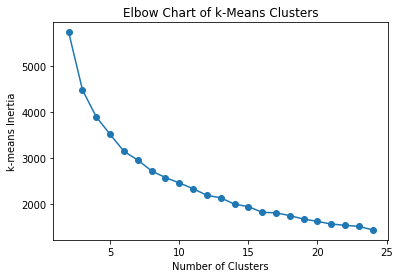

In [71]:
cluster = [x for x in range(2, 25)]
plt.scatter(cluster, metric_)
plt.plot(cluster, metric_)
plt.ylabel('k-means Inertia')
plt.xlabel('Number of Clusters')
plt.title('Elbow Chart of k-Means Clusters')
plt.show()

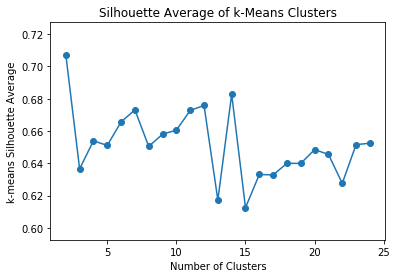

In [72]:
cluster = [x for x in range(2, 25)]
plt.scatter(cluster, silhouette_avg_)
plt.plot(cluster, silhouette_avg_)
plt.ylabel('k-means Silhouette Average')
plt.xlabel('Number of Clusters')
plt.title('Silhouette Average of k-Means Clusters')
plt.show()

In [73]:
silhouette_avg_

[0.70735448025767356,
 0.63656584787553794,
 0.65390424200296726,
 0.6510859604065462,
 0.66564172171420866,
 0.67306086625088102,
 0.65047513919888722,
 0.65802885357637597,
 0.6605519885232759,
 0.67270415517051974,
 0.67587547965489492,
 0.61723884898192216,
 0.68275336731151315,
 0.61255903652670829,
 0.63308160697815807,
 0.63281698821614363,
 0.64000256460168137,
 0.63994252619880632,
 0.64848175254241147,
 0.6455149639192661,
 0.62762006781954927,
 0.65155671635690648,
 0.65246865759865602]

In [74]:
#From the average values, it seems that the best clustering is done with 5-7 clusters.

In [75]:
silhouette_avg_[5]

0.67306086625088102

In [76]:
#http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
#https://www.stat.berkeley.edu/~spector/s133/Clus.html
#https://stats.stackexchange.com/questions/10540/how-to-interpret-mean-of-silhouette-plot